### COURSERA | IBM DATA SCIENCE | POLYNOMIAL REGRESSION
The purpose of this program is to explore polynomial regression by creating a model to predict the carbon dioxide emission of cars based on their fuel consumption. <br>
This program uses fuel consumption and carbon dioxide emission data provided by Coursera.

In [1]:
import numpy as np
import pandas as pd

#### PART 1: DOWNLOAD & CLEAN FUEL CONSUMPTION DATA

In [2]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [3]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-10-30 01:30:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

100%[======================================>] 72,629      --.-K/s   in 0.009s  

2019-10-30 01:30:41 (7.51 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


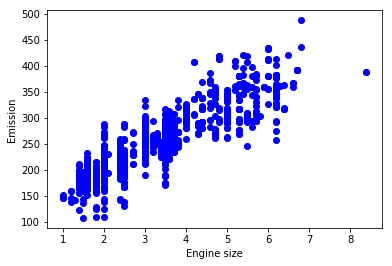

In [5]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

#### PART 2: POLYNOMIAL REGRESSION MODEL

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [8]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [9]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [10]:
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)
print('Coefficients: {}\nIntercept: {}'.format(clf.coef_, clf.intercept_))

Coefficients: [[ 0.         51.31154588 -1.68575235]]
Intercept: [106.45451809]


Text(0, 0.5, 'Emission')

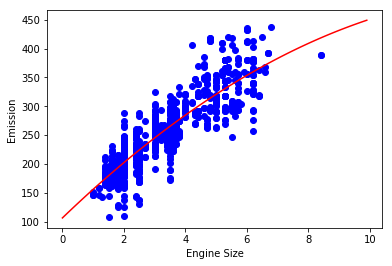

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * xx + clf.coef_[0][2] * np.power(xx, 2)
plt.plot(xx, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

#### PART 3: MODEL EVALUATION

In [12]:
from sklearn.metrics import r2_score

In [13]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print('Mean Absolute Error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual Sum of Squares (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))
print('R2-Score: %.2f' % r2_score(test_y_, test_y))

Mean Absolute Error: 23.67
Residual Sum of Squares (MSE): 1001.25
R2-Score: 0.64
